In [5]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


Rt2_Nils = '../other_programs/COVID19-R/Rvalues_from_smoothed_casedata/Rvalues_smoothed_std_2.csv'


In [6]:
# set cutoff 10 days later to include effects of shiftdays
crossval_2020_03_19 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate = '29/3/2020')
crossval_2020_03_31 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate =  '9/4/2020')
crossval_2020_04_06 = cvc.CrossValidation(ExternalObservableFile = Rt2_Nils, FinalDate = '16/5/2020')

In [7]:
shiftdaylist  = np.arange(10)*2
alphalist     = np.power(10,np.linspace(-4,-1,num=7))
crossvalcount = 10

crossval_2020_03_19.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_2020_03_31.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_2020_04_06.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)

  0 0.000100        14:49:14
  0 0.000316        14:49:29
  0 0.001000        14:49:43
  0 0.003162        14:49:55
  0 0.010000        14:50:03
  0 0.031623        14:50:09
  0 0.100000        14:50:14
  2 0.000100        14:50:32
  2 0.000316        14:50:49
  2 0.001000        14:51:05
  2 0.003162        14:51:18
  2 0.010000        14:51:29
  2 0.031623        14:51:35
  2 0.100000        14:51:41
  4 0.000100        14:52:01
  4 0.000316        14:52:19
  4 0.001000        14:52:35
  4 0.003162        14:52:49
  4 0.010000        14:52:58
  4 0.031623        14:53:05
  4 0.100000        14:53:10
  6 0.000100        14:53:30
  6 0.000316        14:53:47
  6 0.001000        14:54:05
  6 0.003162        14:54:25
  6 0.010000        14:54:40
  6 0.031623        14:54:50
  6 0.100000        14:54:57
  8 0.000100        14:55:25
  8 0.000316        14:55:52
  8 0.001000        14:56:19
  8 0.003162        14:56:40
  8 0.010000        14:56:54
  8 0.031623        14:57:04
  8 0.100000  

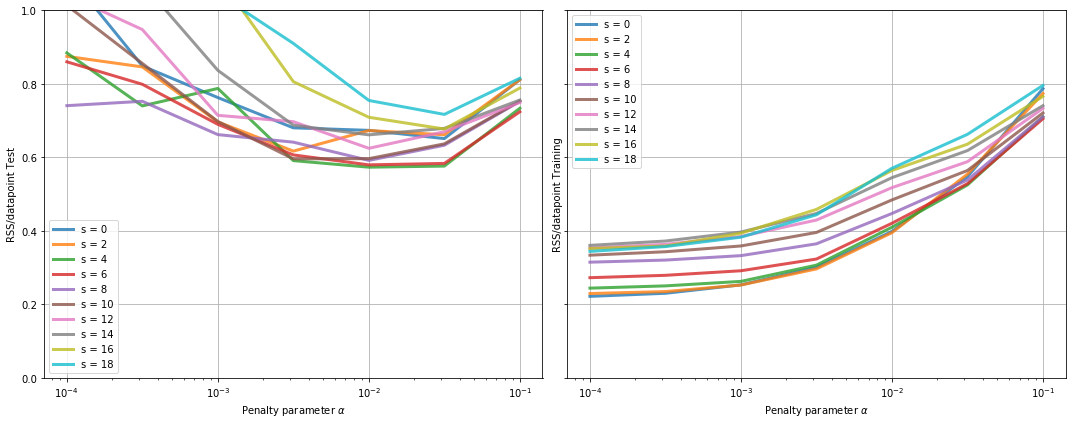

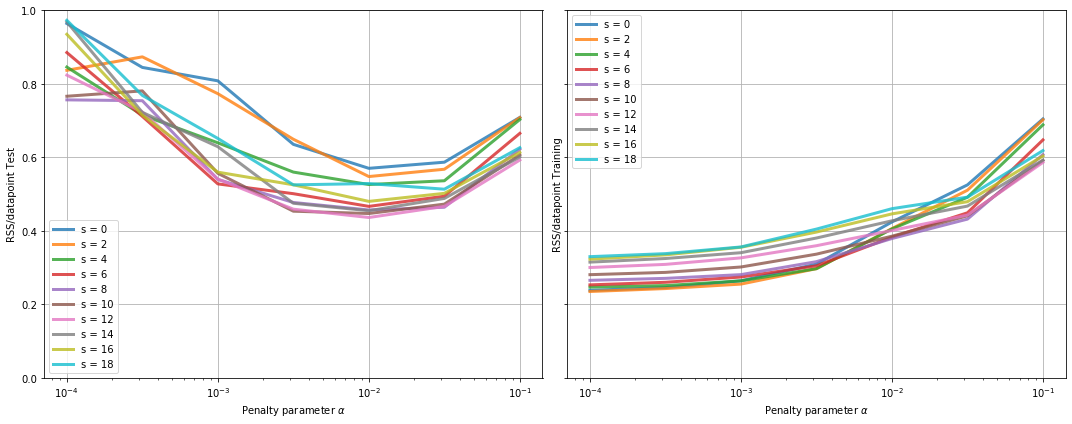

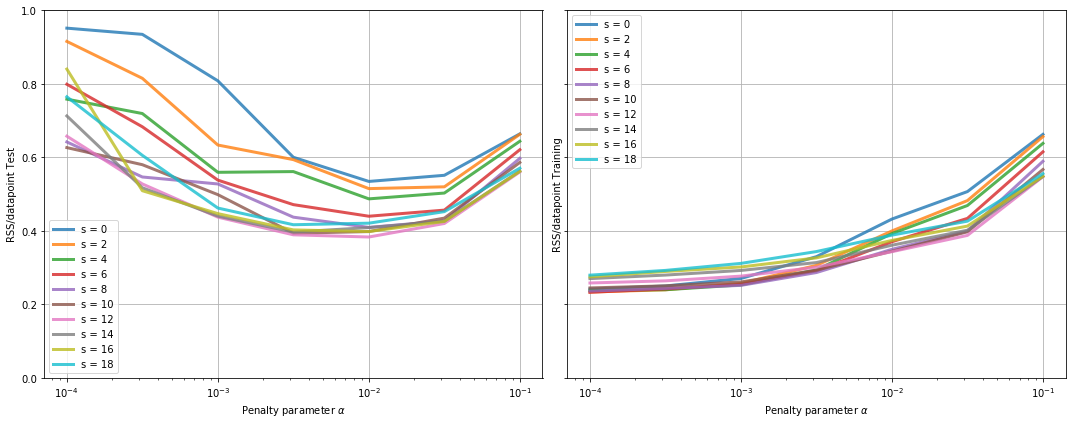

In [8]:
crossval_2020_03_19.PlotCVresults(filename = 'cv_Rt_2020-03-19.pdf')
crossval_2020_03_31.PlotCVresults(filename = 'cv_Rt_2020-03-31.pdf')
crossval_2020_04_06.PlotCVresults(filename = 'cv_Rt_2020-04-06.pdf')

In [28]:
print(crossval_2020_03_19.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_03_31.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_04_06.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())


    shiftdays     alpha  RSS Test Sum  Test Sample Size
15          4  0.010000    500.092392               872
18          4  0.031623    502.671604               872
22          6  0.010000    505.599027               872
25          6  0.031623    509.016811               872
19          4  0.003162    515.655084               872
    shiftdays     alpha  RSS Test Sum  Test Sample Size
43         12  0.010000    604.260771              1384
36         10  0.010000    619.256467              1384
40         10  0.003162    628.019668              1384
50         14  0.010000    629.782454              1384
29          8  0.010000    632.597206              1384
    shiftdays     alpha  RSS Test Sum  Test Sample Size
43         12  0.010000    714.928363              1864
47         12  0.003162    726.069226              1864
40         10  0.003162    734.055289              1864
54         14  0.003162    740.127704              1864
36         10  0.010000    742.526921           

In [29]:
crossval_2020_03_19.ComputeFinalModels(modelparameters=[(4,1e-2)])
crossval_2020_03_31.ComputeFinalModels(modelparameters=[(12,1e-2)])
crossval_2020_04_06.ComputeFinalModels(modelparameters=[(12,1e-2)])


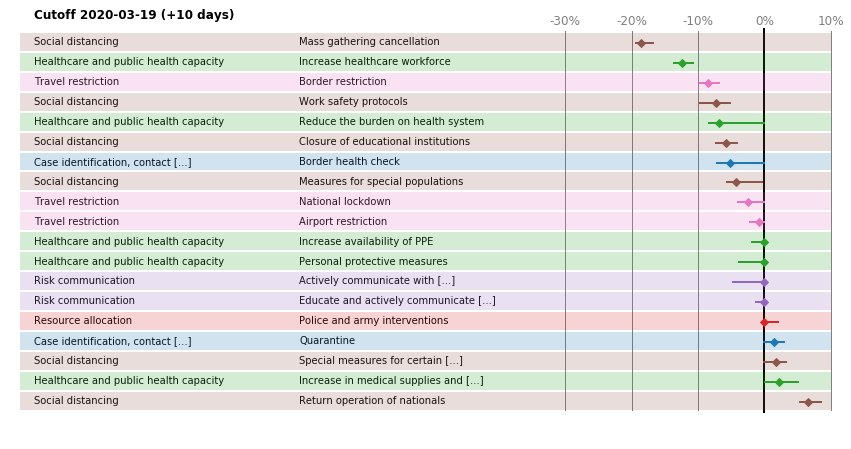

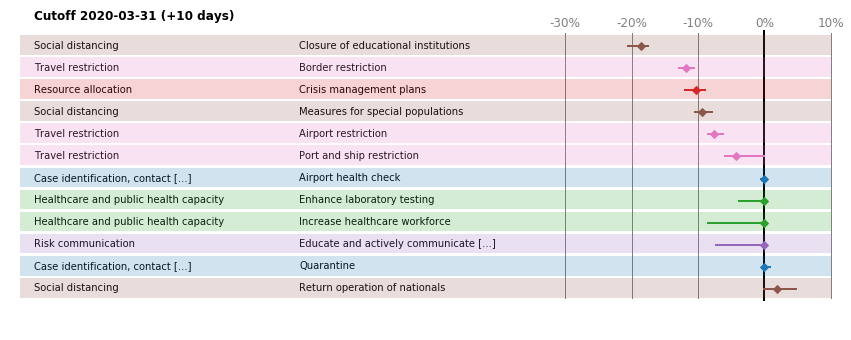

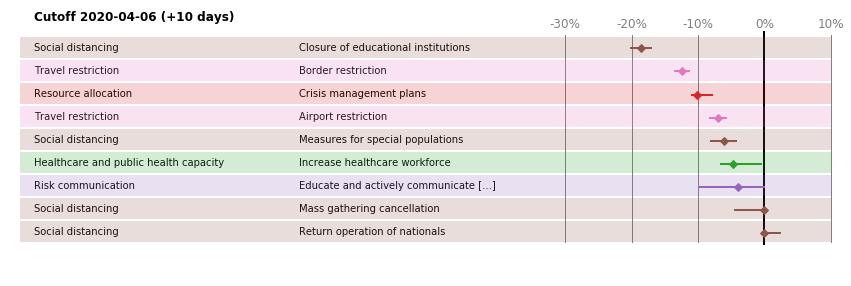

In [38]:
crossval_2020_03_19.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Cutoff 2020-03-19 (+10 days)',filename = 'measures_cutoff20200319.pdf')
crossval_2020_03_31.PlotMeasureListSorted(drop_zeros=True,figsize = (15,6),title = 'Cutoff 2020-03-31 (+10 days)',filename = 'measures_cutoff20200331.pdf')
crossval_2020_04_06.PlotMeasureListSorted(drop_zeros=True,figsize = (15,5),title = 'Cutoff 2020-04-06 (+10 days)',filename = 'measures_cutoff20200406.pdf')